In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("542_proj_dataset_1_v1.0\OnlineNewsPopularity.csv")
df = df.drop(["url"], axis = 1)
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [77]:
df_days = df[["weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday"]]

In [78]:
df_days = pd.from_dummies(df_days, sep = '_is_' )
df_days.head()

,weekday
0,monday
1,monday
2,monday
3,monday
4,monday


In [159]:
data_channel = df[["data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world"]]
data_channel.head(13)

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,1,0,0,0,0,0
7,0,0,0,0,1,0
8,0,0,0,0,1,0
9,0,0,0,0,0,1


In [166]:
data_channel["channel"] = "others"
for index, row in data_channel.iterrows():
    if(row["data_channel_is_lifestyle"] == 1):
        data_channel["channel"][index] = "lifestyle"
    elif(row["data_channel_is_entertainment"] == 1):
        data_channel["channel"][index] = "entertainment"
    elif(row["data_channel_is_bus"] == 1):
        data_channel["channel"][index] = "business"
    elif(row["data_channel_is_socmed"] == 1):
        data_channel["channel"][index] = "social_media"
    elif(row["data_channel_is_tech"] == 1):
        data_channel["channel"][index] = "technology"
    elif(row["data_channel_is_world"] == 1):
        data_channel["channel"][index] = "world"      
    else:
        data_channel["channel"][index] = "others"

data_channel.head(20)

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,channel
0,0,1,0,0,0,0,entertainment
1,0,0,1,0,0,0,business
2,0,0,1,0,0,0,business
3,0,1,0,0,0,0,entertainment
4,0,0,0,0,1,0,technology
5,0,0,0,0,1,0,technology
6,1,0,0,0,0,0,lifestyle
7,0,0,0,0,1,0,technology
8,0,0,0,0,1,0,technology
9,0,0,0,0,0,1,world


In [167]:
df = pd.concat([df, df_days, data_channel], axis=1)
df

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,abs_title_sentiment_polarity,shares,weekday,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,channel
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.187500,593,monday,0,1,0,0,0,0,entertainment
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.000000,711,monday,0,0,1,0,0,0,business
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.000000,1500,monday,0,0,1,0,0,0,business
3,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.000000,1200,monday,0,1,0,0,0,0,entertainment
4,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.136364,505,monday,0,0,0,0,1,0,technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8,11,346,0.529052,1.0,0.684783,9,7,1,1,...,0.000000,1800,wednesday,0,0,0,0,1,0,technology
39640,8,12,328,0.696296,1.0,0.885057,9,7,3,48,...,1.000000,1900,wednesday,0,0,0,1,0,0,social_media
39641,8,10,442,0.516355,1.0,0.644128,24,1,12,1,...,0.136364,1900,wednesday,0,0,0,0,0,0,others
39642,8,6,682,0.539493,1.0,0.692661,10,1,1,0,...,0.000000,1100,wednesday,0,0,0,0,0,1,world


In [3]:
#df = df.drop(["timedelta", "n_tokens_content", "n_unique_tokens","n_non_stop_words","n_non_stop_unique_tokens", "num_self_hrefs","kw_min_min","kw_min_max","LDA_00", "global_sentiment_polarity","global_rate_positive_words", "min_positive_polarity","abs_title_subjectivity","shares"], axis = 1)
#df = df[["num_hrefs", "data_channel_is_world","kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares","self_reference_avg_sharess", "LDA_02", "LDA_03", "shares"]]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_hrefs                   39644 non-null  float64
 1   data_channel_is_world       39644 non-null  float64
 2   kw_max_avg                  39644 non-null  float64
 3   kw_avg_avg                  39644 non-null  float64
 4   self_reference_min_shares   39644 non-null  float64
 5   self_reference_max_shares   39644 non-null  float64
 6   self_reference_avg_sharess  39644 non-null  float64
 7   LDA_02                      39644 non-null  float64
 8   LDA_03                      39644 non-null  float64
 9   shares                      39644 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 3.0 MB


In [36]:
df = np.log1p(df)

<Axes: ylabel='shares'>

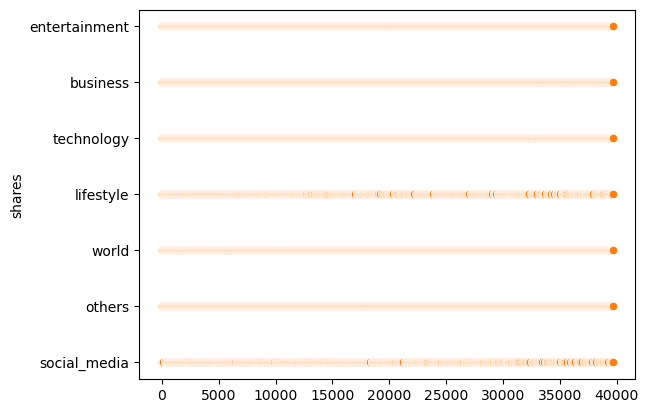

In [168]:
sample = 39644
sns.scatterplot(df["shares"][:sample])
sns.scatterplot(df["channel"][:sample])

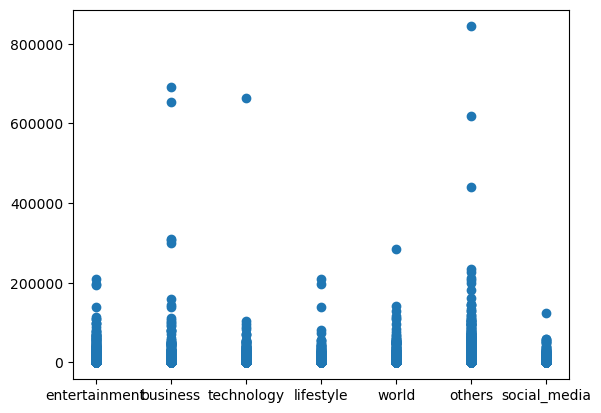

In [189]:
plt.scatter(df["channel"], df["shares"])

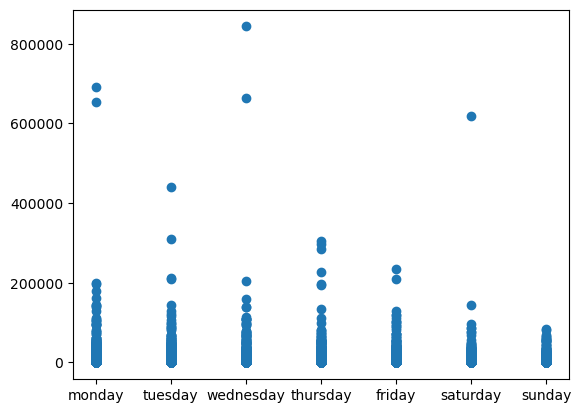

In [191]:
plt.scatter(df["weekday"], df["shares"])

In [ ]:
#X = df.drop(["timedelta", "n_tokens_content", "n_unique_tokens","n_non_stop_words","n_non_stop_unique_tokens", "num_self_hrefs","kw_min_min","kw_min_max","LDA_00", "global_sentiment_polarity","global_rate_positive_words", "min_positive_polarity","abs_title_subjectivity","shares"], axis = 1)
#X = df[["num_hrefs", "data_channel_is_world","kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares","self_reference_avg_sharess", "LDA_02", "LDA_03"]]

In [ ]:
sns.pairplot(df[:100])

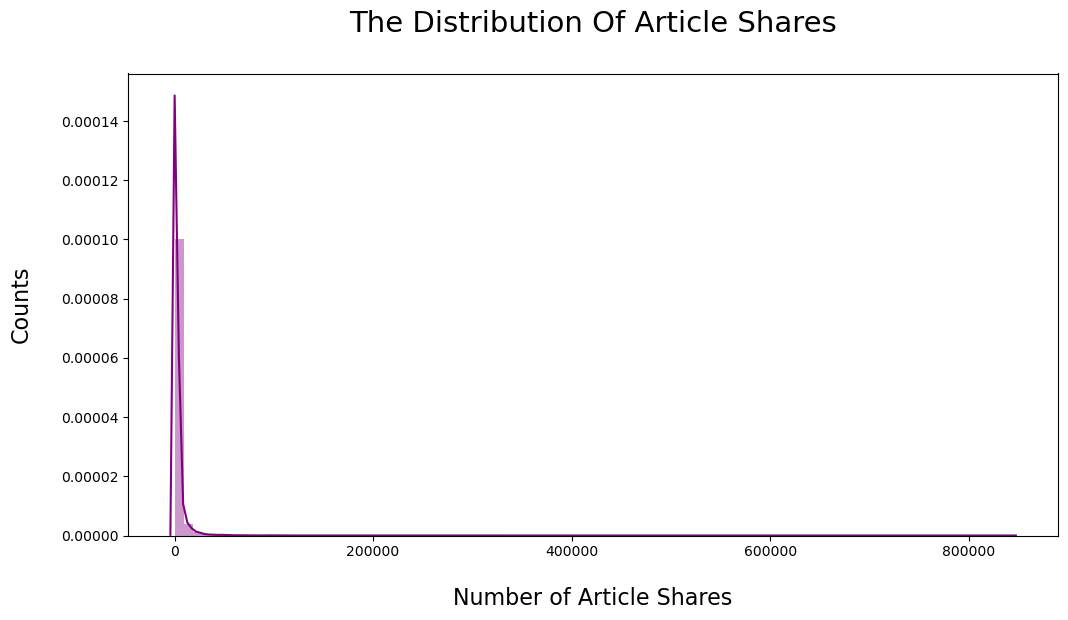

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(df['shares'], color='purple', bins=90)
plt.title('The Distribution Of Article Shares', pad=30, fontsize='21')
plt.xlabel('Number of Article Shares', fontsize='16', labelpad=20)
plt.ylabel('Counts',  fontsize='16', labelpad=20)
plt.savefig('Article_Share_Distribution',dpi=200)
plt.show()

In [10]:
df['shares_log'] = np.log1pdf['shares']

,num_hrefs,data_channel_is_world,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_02,LDA_03,shares,shares_log
0,4.0,0.0,0.000000,0.000000,496.0,496.0,496.000000,0.040005,0.041263,593,6.386879
1,3.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.050096,0.050101,711,6.568078
2,3.0,0.0,0.000000,0.000000,918.0,918.0,918.000000,0.033351,0.033334,1500,7.313887
3,9.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.494651,0.028905,1200,7.090910
4,19.0,0.0,0.000000,0.000000,545.0,16000.0,3151.157895,0.028575,0.028572,505,6.226537
...,...,...,...,...,...,...,...,...,...,...,...
39639,9.0,0.0,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.151701,0.025000,1800,7.496097
39640,9.0,0.0,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.231866,0.681635,1900,7.550135
39641,24.0,0.0,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.025207,0.643794,1900,7.550135
39642,10.0,1.0,3384.316871,1777.895883,452.0,452.0,452.000000,0.839987,0.040002,1100,7.003974


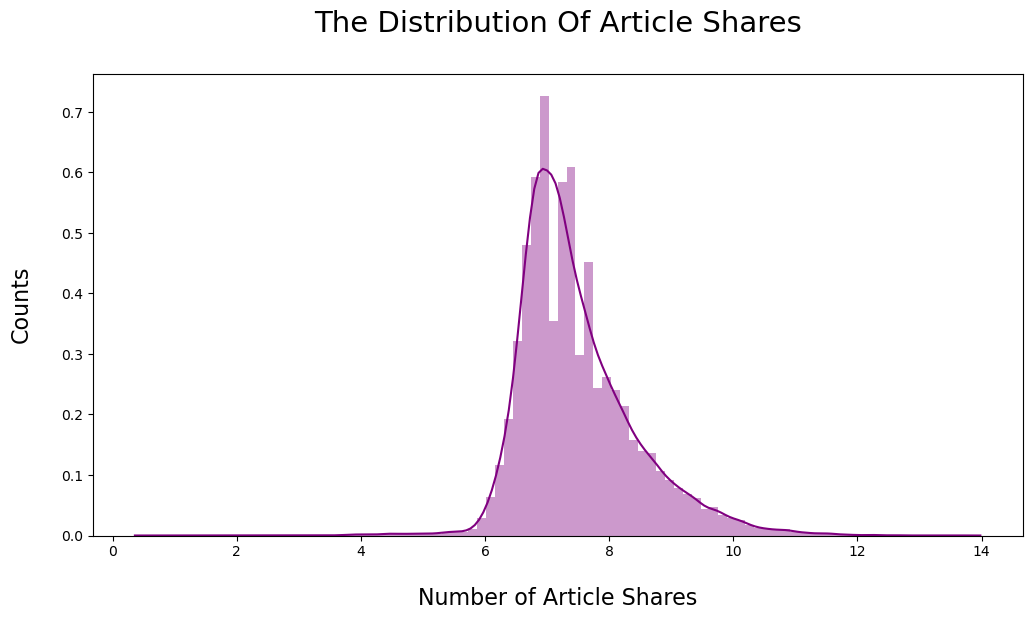

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(df['shares_log'], color='purple', bins=90)
plt.title('The Distribution Of Article Shares', pad=30, fontsize='21')
plt.xlabel('Number of Article Shares', fontsize='16', labelpad=20)
plt.ylabel('Counts',  fontsize='16', labelpad=20)
plt.savefig('Article_Share_Distribution',dpi=200)
plt.show()

In [14]:

back = np.expm1(df['shares_log'])
back

0         593.0
1         711.0
2        1500.0
3        1200.0
4         505.0
          ...  
39639    1800.0
39640    1900.0
39641    1900.0
39642    1100.0
39643    1300.0
Name: shares_log, Length: 39644, dtype: float64

In [181]:
df[df["shares"] > 300000].index

Index([3145, 4506, 5370, 9365, 16009, 16268, 18788, 23237], dtype='int64')

In [185]:
df_new = df.drop(df[df["shares"] > 300000].index, axis = 0)
df_new.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
count,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000,...,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000,39636.000000
mean,354.501463,10.398754,546.472500,0.548223,0.996468,0.689184,10.882809,3.293471,4.543395,1.249647,...,0.071437,0.341837,0.156077,3281.876375,0.052957,0.178045,0.157786,0.058608,0.185311,0.212610
std,214.166291,2.114132,471.025094,3.521063,5.231759,3.265145,11.332099,3.855300,8.309244,4.107969,...,0.265467,0.188789,0.226308,8049.745033,0.223950,0.382556,0.364545,0.234893,0.388555,0.409159
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625752,4.000000,1.000000,1.000000,0.000000,...,0.000000,0.166667,0.000000,946.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,339.000000,10.000000,409.000000,0.539238,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.000000,0.500000,0.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754634,14.000000,4.000000,4.000000,1.000000,...,0.150000,0.500000,0.250000,2800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,0.500000,1.000000,298400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


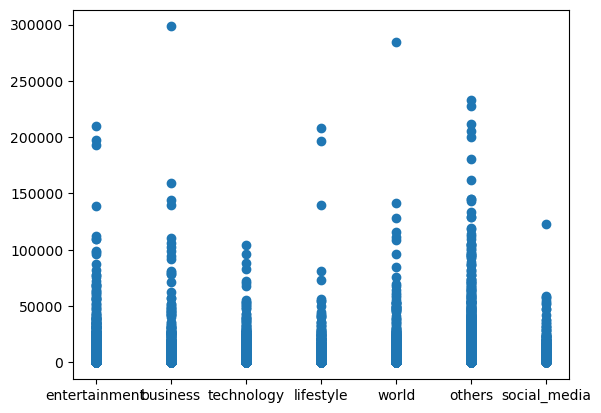

In [186]:
plt.scatter(df_new["channel"], df_new["shares"])

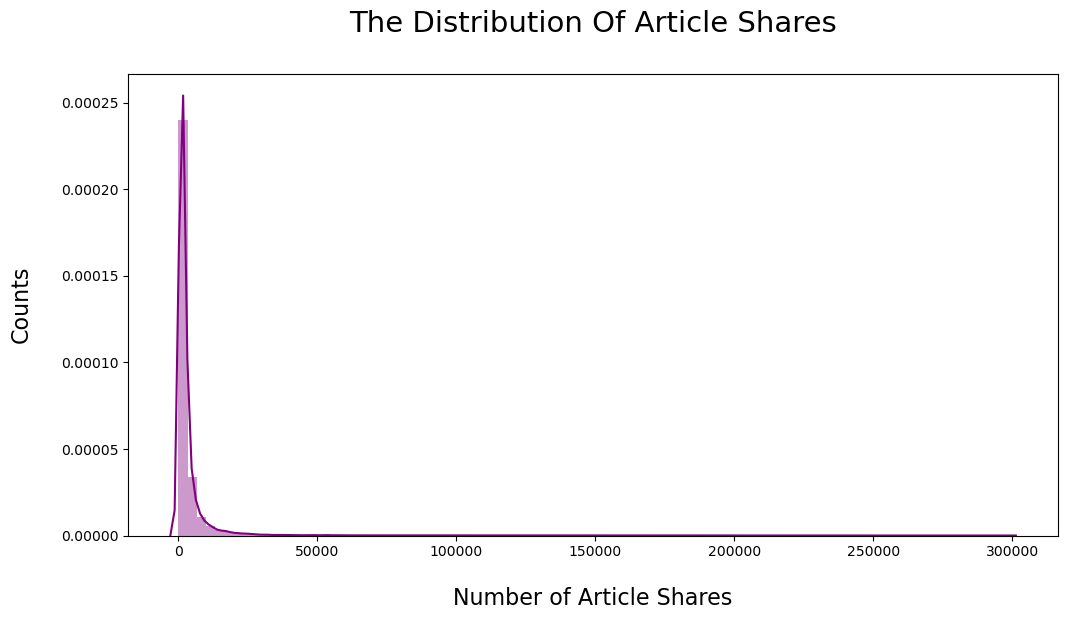

In [187]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(df_new['shares'], color='purple', bins=90)
plt.title('The Distribution Of Article Shares', pad=30, fontsize='21')
plt.xlabel('Number of Article Shares', fontsize='16', labelpad=20)
plt.ylabel('Counts',  fontsize='16', labelpad=20)
plt.savefig('Article_Share_Distribution',dpi=200)
plt.show()

In [33]:
#val = np.ones(shape= (30, 1))
val = np.random.random(size= (30, 1))
df = pd.DataFrame(val)
df.describe()

,0
count,30.000000
mean,0.550595
std,0.295226
min,0.022281
25%,0.305201
50%,0.629526
75%,0.791812
max,0.986959


In [34]:
df.head()

,0
0,0.591694
1,0.360047
2,0.986959
3,0.692702
4,0.402249


In [27]:
from sklearn.preprocessing import StandardScaler
ssObject = StandardScaler()
X_scaled = ssObject.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)
X_scaled.describe()

,0
count,30.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0
